# World Population Analysis

In [ ]:
import pandas as pd
df = pd.read_csv(r'C:\Users\rocky\Downloads\world_population.csv')
df.head()

## Population changes for each year

In [56]:

for i in range(1, len(years)):
    year = years[i]
    prev_year = years[i-1]
    year_population_col = f'{year} Population'
    prev_year_population_col = f'{prev_year} Population'
    if year_population_col in df.columns and prev_year_population_col in df.columns:
        df[f'Change_{year}'] = df[year_population_col] - df[prev_year_population_col]
df.head()

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,...,Area (km²),Density (per km²),Growth Rate,World Population Percentage,Change_1980,Change_1990,Change_2000,Change_2010,Change_2020,Change_2022
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,...,652230,63.0587,1.0257,0.52,1733660,-1791835,8848186,8646690,10782558,2156541
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,...,28748,98.8702,0.9957,0.04,616920,353415,-113045,-268622,-46550,-24528
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,...,2381741,18.8531,1.0164,0.56,4943463,6778696,5256547,5081723,7595322,1451559
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,...,199,222.4774,0.9831,0.00,5811,14932,10412,-3381,-8660,-1916
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,...,468,170.5641,1.0100,0.00,15751,17958,12528,5422,6181,2124


## Calculating the Top 10 countires in year 2022

In [46]:
if '2022 Population' in df.columns:
    top_10_countries = df.nlargest(10, '2022 Population')
    print(top_10_countries[['Country', '2022 Population']])
else:
    print("Column '2022 Population' not found in the dataset.")

           Country  2022 Population
41           China     1.425887e+09
92           India     1.417173e+09
221  United States     3.382899e+08
93       Indonesia     2.755013e+08
156       Pakistan     2.358249e+08
149        Nigeria     2.185412e+08
27          Brazil     2.153135e+08
16      Bangladesh     1.711864e+08
171         Russia     1.447133e+08
131         Mexico     1.275041e+08


## Top 10 countries comparision

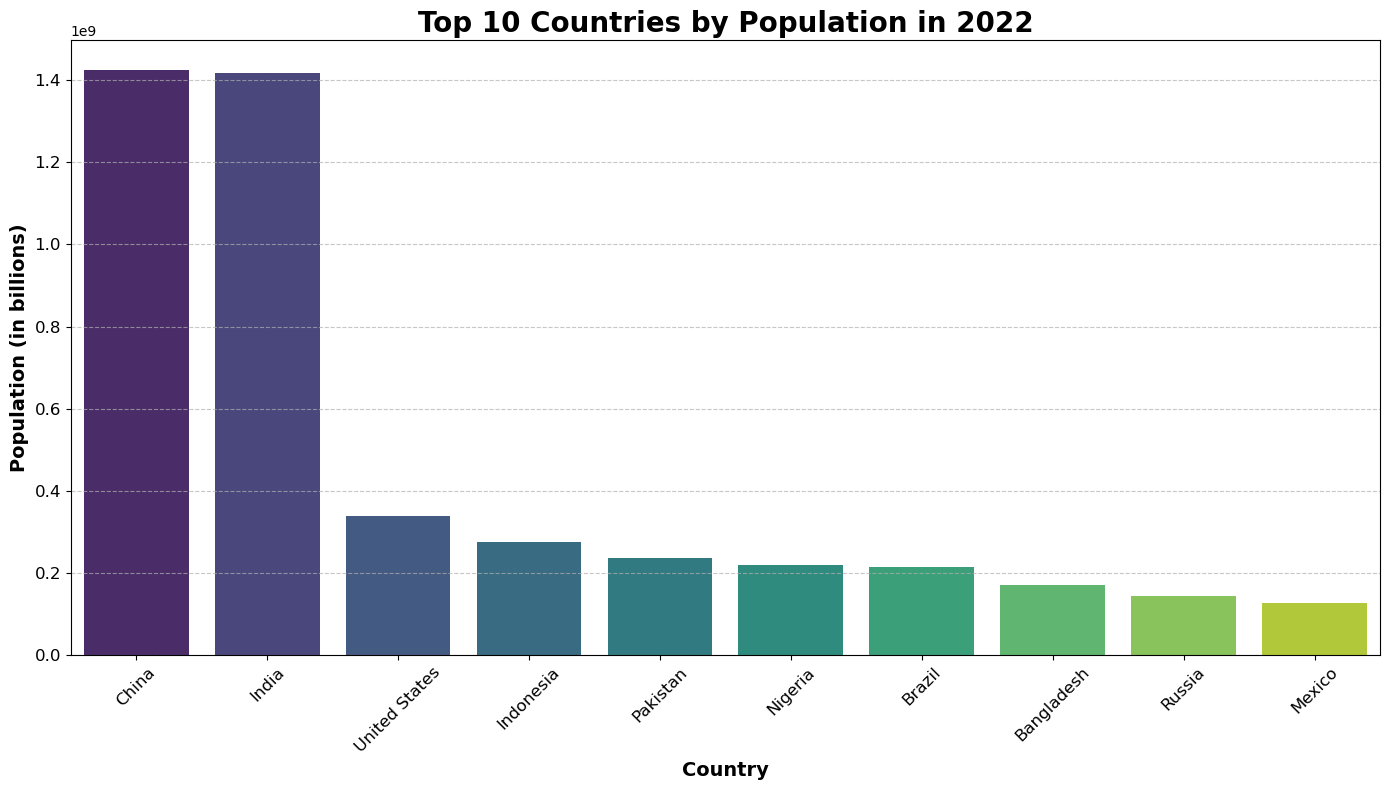

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
if 'top_10_countries' in locals():
    plt.figure(figsize=(14, 8))
    sns.barplot(data=top_10_countries, x='Country', y='2022 Population', palette='viridis')
    plt.title('Top 10 Countries by Population in 2022', fontsize=20, fontweight='bold')
    plt.xlabel('Country', fontsize=14, fontweight='bold')
    plt.ylabel('Population (in billions)', fontsize=14, fontweight='bold')
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("top_10_countries is not defined.")

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


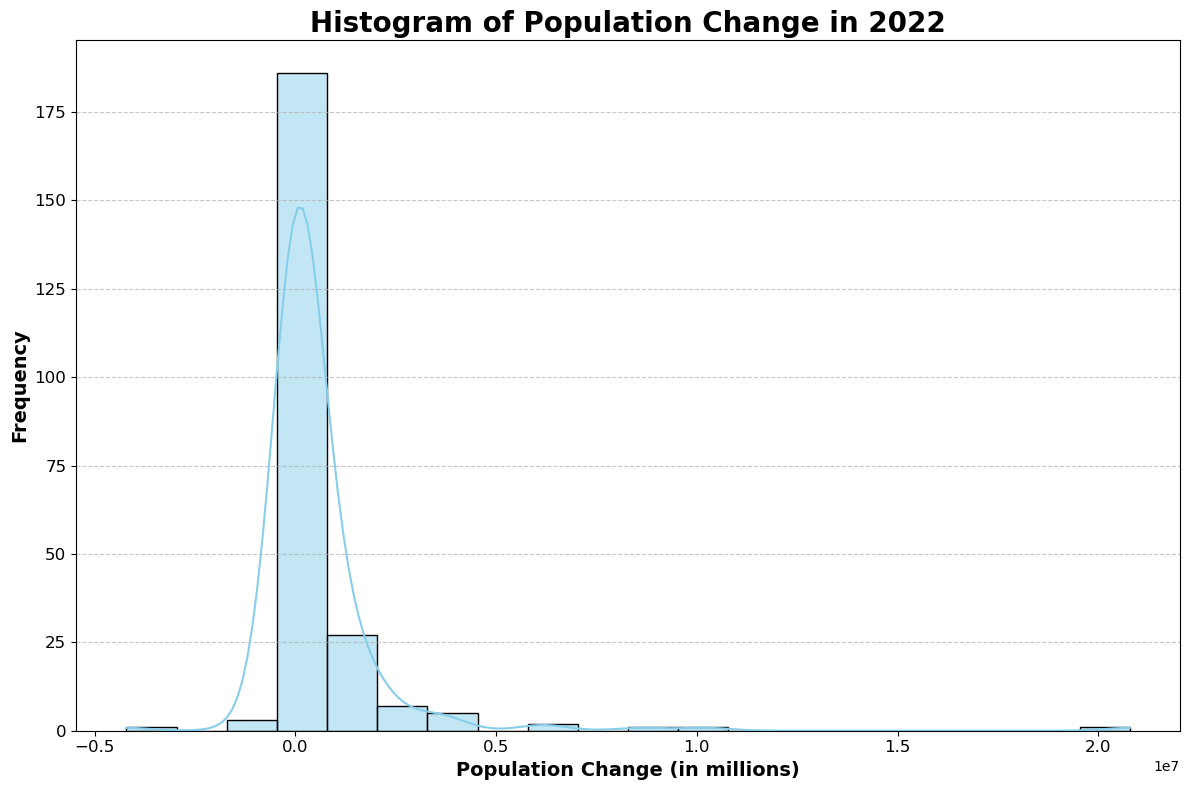

In [50]:
if 'Change_2022' in df.columns:
    plt.figure(figsize=(12, 8))
    sns.histplot(df['Change_2022'].dropna(), bins=20, kde=True, color='skyblue')
    plt.title('Histogram of Population Change in 2022', fontsize=20, fontweight='bold')
    plt.xlabel('Population Change (in millions)', fontsize=14, fontweight='bold')
    plt.ylabel('Frequency', fontsize=14, fontweight='bold')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("'Change_2022' column is not found in the dataframe.")

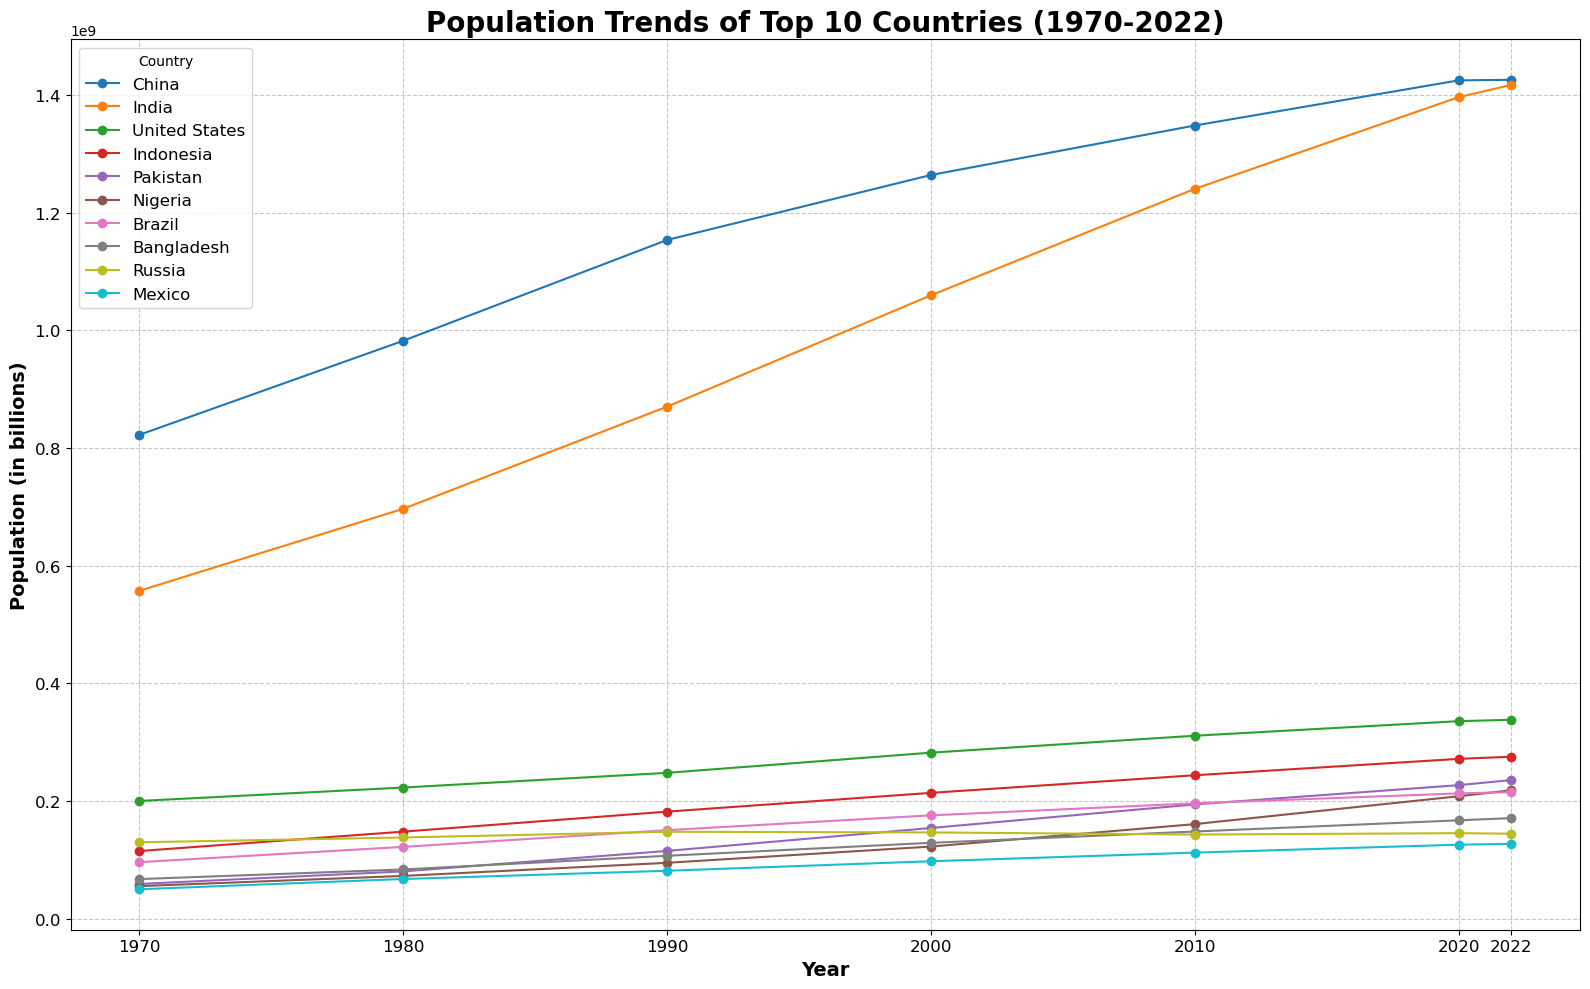

In [48]:
if 'top_10_countries' in locals():
    plt.figure(figsize=(16, 10))
    for country in top_10_countries['Country']:
        country_data = df[df['Country'] == country]
        plt.plot(years, [country_data[f'{year} Population'].values[0] for year in years], marker='o', label=country)
    plt.title('Population Trends of Top 10 Countries (1970-2022)', fontsize=20, fontweight='bold')
    plt.xlabel('Year', fontsize=14, fontweight='bold')
    plt.ylabel('Population (in billions)', fontsize=14, fontweight='bold')
    plt.xticks(years, fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(title='Country', fontsize=12)
    plt.grid(axis='both', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("top_10_countries is not defined.")

## Comparision of India and Chaina over the years 

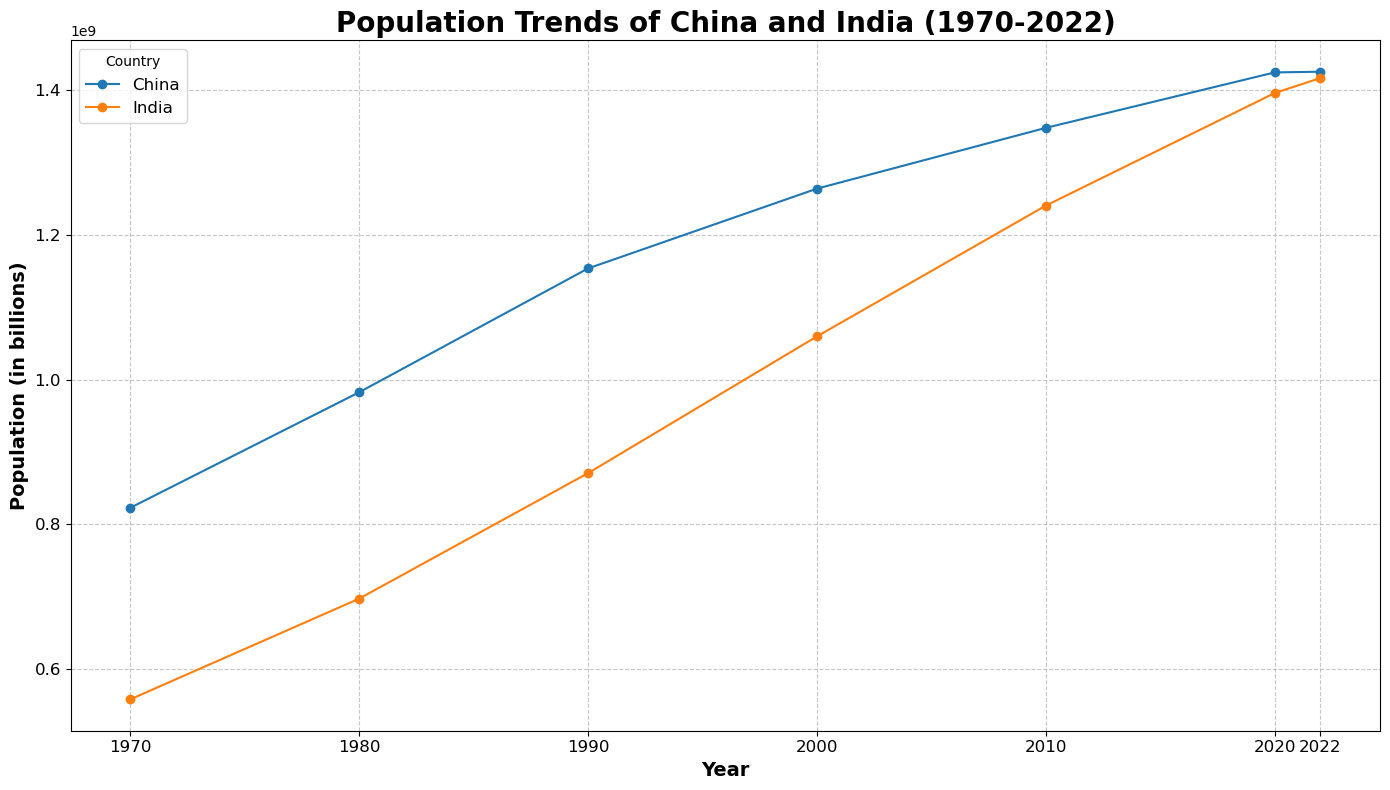

In [49]:
if 'China' in df['Country'].values and 'India' in df['Country'].values:
    # Filter the data for China and India
    china_data = df[df['Country'] == 'China']
    india_data = df[df['Country'] == 'India']
    plt.figure(figsize=(14, 8)) 
    plt.plot(years, [china_data[f'{year} Population'].values[0] for year in years], marker='o', label='China')
    plt.plot(years, [india_data[f'{year} Population'].values[0] for year in years], marker='o', label='India')
    plt.title('Population Trends of China and India (1970-2022)', fontsize=20, fontweight='bold')
    plt.xlabel('Year', fontsize=14, fontweight='bold')
    plt.ylabel('Population (in billions)', fontsize=14, fontweight='bold')
    plt.xticks(years, fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(title='Country', fontsize=12)
    plt.grid(axis='both', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("China or India is not found in the dataset.")